# Introduction to Segment Trees

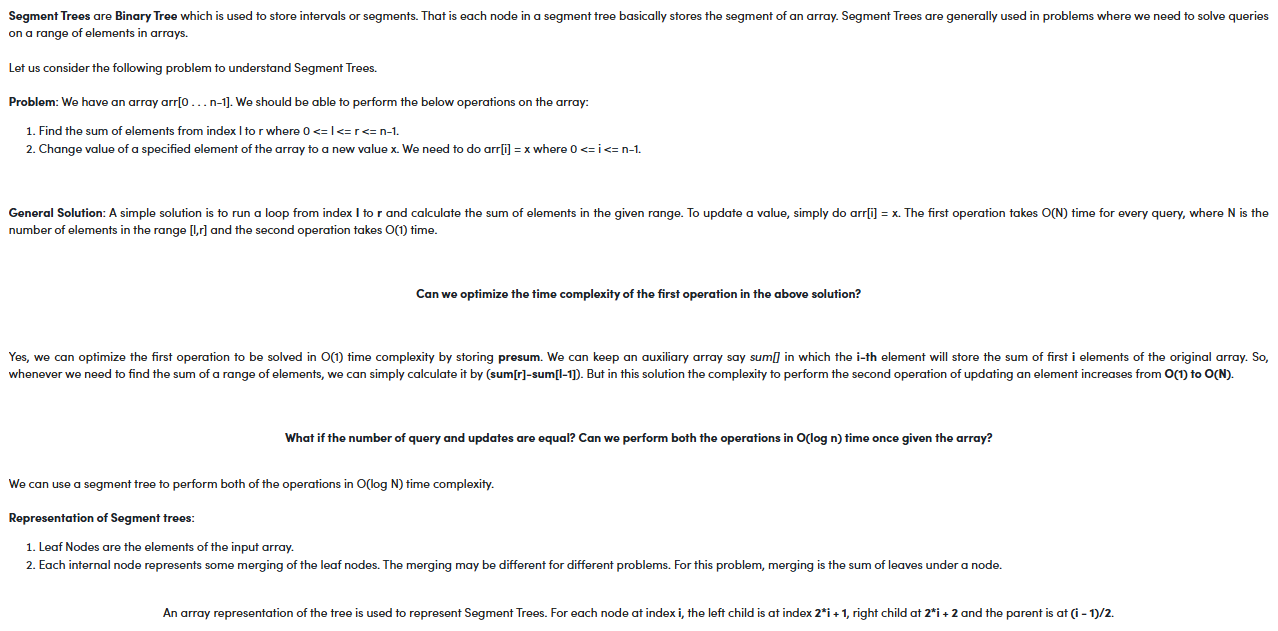

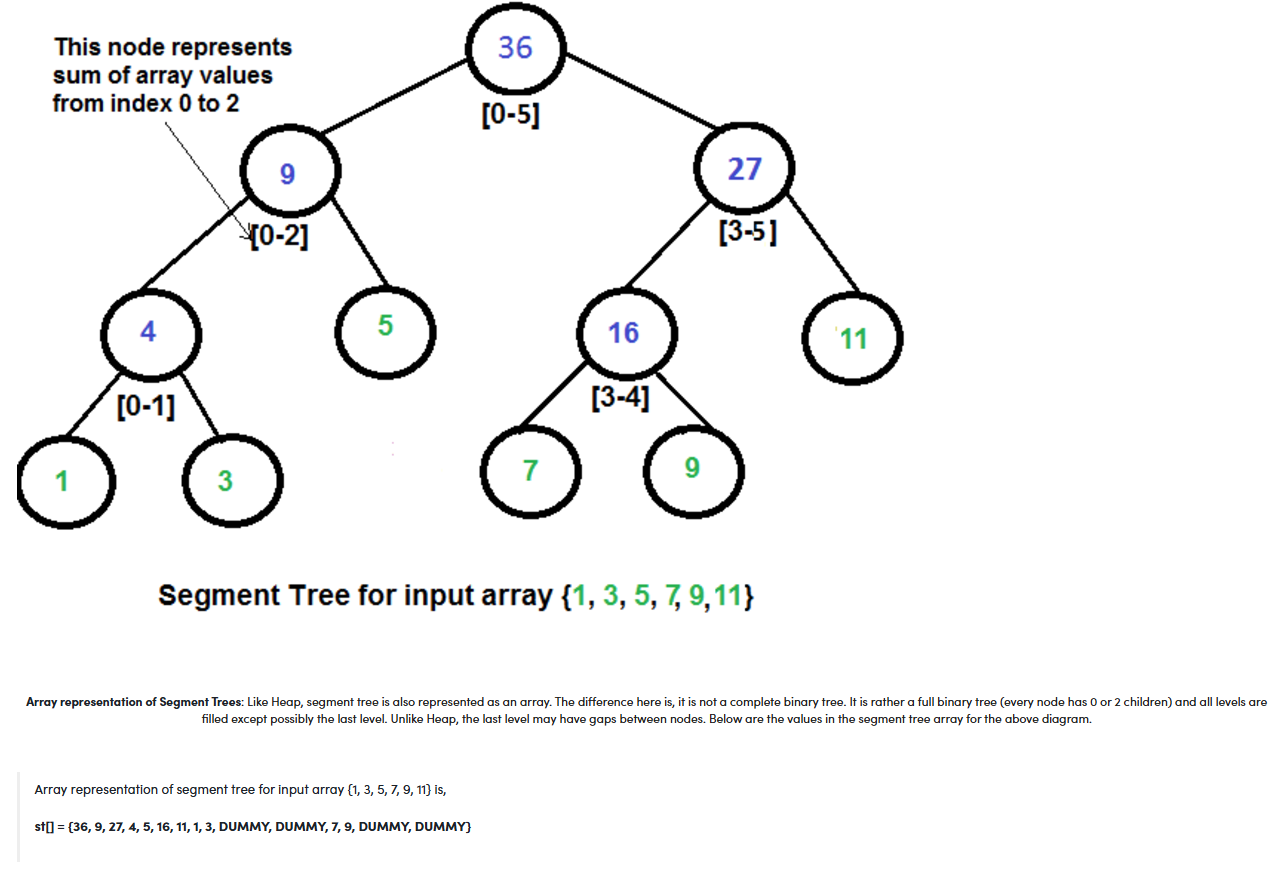

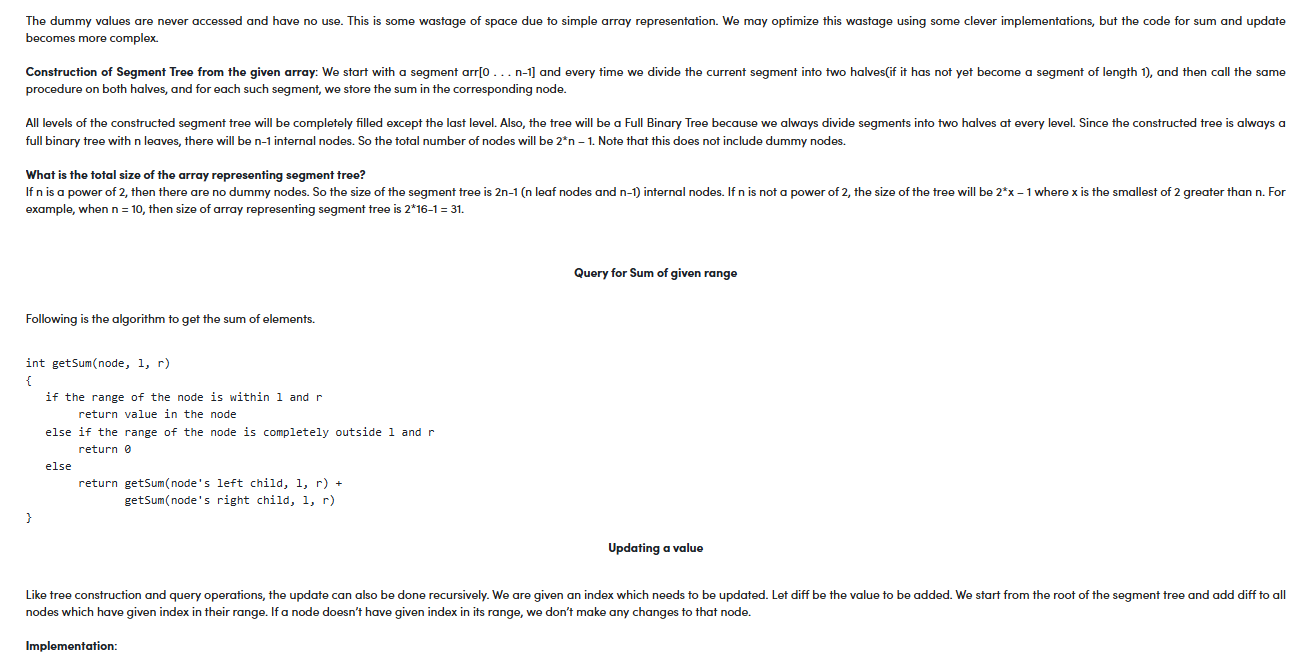

In [53]:
# Python3 program to show segment tree operations like
# construction, query and update
from math import ceil, log2;

# A utility function to get the
# middle index from corner indexes.
def getMid(s, e) :
	return s + (e -s) // 2;

""" A recursive function to get the sum of values
	in the given range of the array. The following
	are parameters for this function.

	st --> Pointer to segment tree
	si --> Index of current node in the segment tree.
		Initially 0 is passed as root is always at index 0
	ss & se --> Starting and ending indexes of the segment
				represented by current node, i.e., st[si]
	qs & qe --> Starting and ending indexes of query range """
def getSumUtil(st, ss, se, qs, qe, si) :

	# If segment of this node is a part of given range,
	# then return the sum of the segment
	if (qs <= ss and qe >= se) :
		return st[si];

	# If segment of this node is
	# outside the given range
	if (se < qs or ss > qe) :
		return 0;

	# If a part of this segment overlaps
	# with the given range
	mid = getMid(ss, se)

	return getSumUtil(st, ss, mid, qs, qe, 2 * si + 1) + getSumUtil(st, mid + 1, se, qs, qe, 2 * si + 2)
""" A recursive function to update the nodes
which have the given index in their range.
The following are parameters st, si, ss and se
are same as getSumUtil()
i --> index of the element to be updated.
	This index is in the input array.
diff --> Value to be added to all nodes
which have i in range """
def updateValueUtil(st, ss, se, i, diff, si) :

	# Base Case: If the input index lies
	# outside the range of this segment
	if (i < ss or i > se) :
		return;

	# If the input index is in range of this node,
	# then update the value of the node and its children
	st[si] = st[si] + diff;

	if (se != ss) :

		mid = getMid(ss, se);
		updateValueUtil(st, ss, mid, i,
						diff, 2 * si + 1);
		updateValueUtil(st, mid + 1, se, i,
						diff, 2 * si + 2);

# The function to update a value in input array
# and segment tree. It uses updateValueUtil()
# to update the value in segment tree
def updateValue(arr, st, n, i, new_val) :

	# Check for erroneous input index
	if (i < 0 or i > n - 1) :

		print("Invalid Input", end = "");
		return;

	# Get the difference between
	# new value and old value
	diff = new_val - arr[i];

	# Update the value in array
	arr[i] = new_val;

	# Update the values of nodes in segment tree
	updateValueUtil(st, 0, n - 1, i, diff, 0);

# Return sum of elements in range from
# index qs (query start) to qe (query end).
# It mainly uses getSumUtil()
def getSum(st, n, qs, qe) :

	# Check for erroneous input values
	if (qs < 0 or qe > n - 1 or qs > qe) :

		print("Invalid Input", end = "");
		return -1;

	return getSumUtil(st, 0, n - 1, qs, qe, 0);

# A recursive function that constructs
# Segment Tree for array[ss..se].
# si is index of current node in segment tree st
def constructSTUtil(arr, ss, se, st, si) :

	# If there is one element in array,
	# store it in current node of
	# segment tree and return
	if (ss == se) :

		st[si] = arr[ss];
		return arr[ss];

	# If there are more than one elements,
	# then recur for left and right subtrees
	# and store the sum of values in this node
	mid = getMid(ss, se);

	st[si] = constructSTUtil(arr, ss, mid, st, si * 2 + 1) + constructSTUtil(arr, mid + 1, se, st, si * 2 + 2);

	return st[si];

""" Function to construct segment tree
from given array. This function allocates memory
for segment tree and calls constructSTUtil() to
fill the allocated memory """
def constructST(arr, n) :

	# Allocate memory for the segment tree

	# Height of segment tree
	x = (int)(ceil(log2(n)));

	# Maximum size of segment tree
	max_size = 2 * (int)(2**x) - 1;

	# Allocate memory
	st = [0] * max_size;

	# Fill the allocated memory st
	constructSTUtil(arr, 0, n - 1, st, 0);

	# Return the constructed segment tree
	return st;

# Driver Code
if __name__ == "__main__" :

	arr = [1, 3, 5, 7, 9, 11];
	n = len(arr);

	# Build segment tree from given array
	st = constructST(arr, n);

	# Print sum of values in array from index 1 to 3
	print("Sum of values in given range = ",
					getSum(st, n, 1, 3));

	# Update: set arr[1] = 10 and update
	# corresponding segment tree nodes
	updateValue(arr, st, n, 1, 10);

	# Find sum after the value is updated
	print("Updated sum of values in given range = ",
					getSum(st, n, 1, 3), end = "");

Sum of values in given range =  15
Updated sum of values in given range =  22

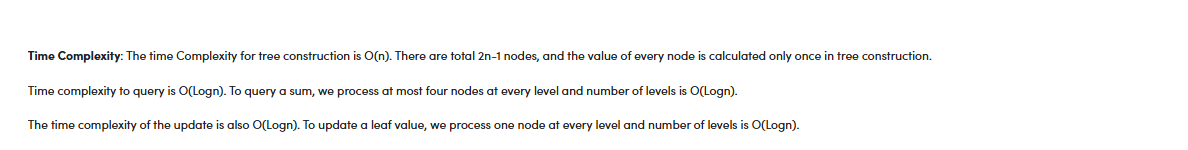

# Segment Tree | Range Minimum Query

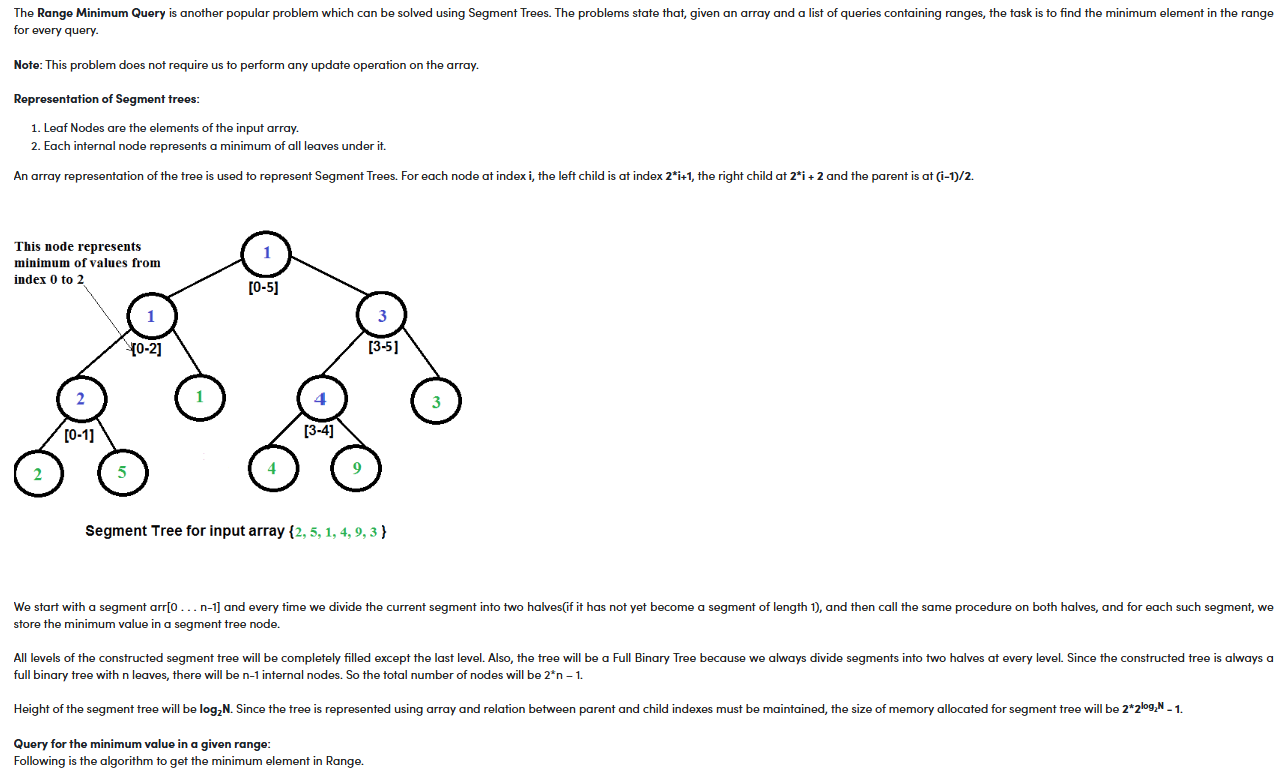

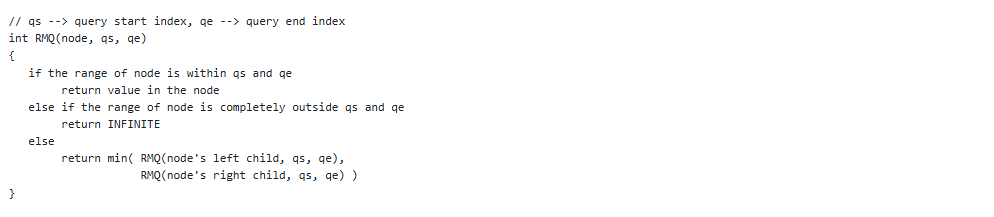

In [54]:
# Python3 program for range minimum
# query using segment tree
import sys
from math import ceil, log2

INT_MAX = sys.maxsize

# A utility function to get
# minimum of two numbers


def minVal(x, y):
    return x if (x < y) else y

# A utility function to get the
# middle index from corner indexes.


def getMid(s, e):
    return s + (e - s) // 2


""" A recursive function to get the
minimum value in a given range
of array indexes. The following
are parameters for this function.

	st --> Pointer to segment tree
	index --> Index of current node in the
		segment tree. Initially 0 is
		passed as root is always at index 0
	ss & se --> Starting and ending indexes
				of the segment represented
				by current node, i.e., st[index]
	qs & qe --> Starting and ending indexes of query range """


def RMQUtil(st, ss, se, qs, qe, index):

    # If segment of this node is a part
    # of given range, then return
    # the min of the segment
    if (qs <= ss and qe >= se):
        return st[index]

    # If segment of this node
    # is outside the given range
    if (se < qs or ss > qe):
        return INT_MAX

    # If a part of this segment
    # overlaps with the given range
    mid = getMid(ss, se)
    return minVal(RMQUtil(st, ss, mid, qs,
                          qe, 2 * index + 1),
                  RMQUtil(st, mid + 1, se,
                          qs, qe, 2 * index + 2))

# Return minimum of elements in range
# from index qs (query start) to
# qe (query end). It mainly uses RMQUtil()


def RMQ(st, n, qs, qe):

    # Check for erroneous input values
    if (qs < 0 or qe > n - 1 or qs > qe):

        print("Invalid Input")
        return -1

    return RMQUtil(st, 0, n - 1, qs, qe, 0)

# A recursive function that constructs
# Segment Tree for array[ss..se].
# si is index of current node in segment tree st


def constructSTUtil(arr, ss, se, st, si):

    # If there is one element in array,
    # store it in current node of
    # segment tree and return
    if (ss == se):

        st[si] = arr[ss]
        return arr[ss]

    # If there are more than one elements,
    # then recur for left and right subtrees
    # and store the minimum of two values in this node
    mid = getMid(ss, se)
    st[si] = minVal(constructSTUtil(arr, ss, mid,
                                    st, si * 2 + 1),
                    constructSTUtil(arr, mid + 1, se,
                                    st, si * 2 + 2))

    return st[si]


"""Function to construct segment tree
from given array. This function allocates
memory for segment tree and calls constructSTUtil()
to fill the allocated memory """


def constructST(arr, n):

    # Allocate memory for segment tree

    # Height of segment tree
    x = (int)(ceil(log2(n)))

    # Maximum size of segment tree
    max_size = 2 * (int)(2**x) - 1

    st = [0] * (max_size)

    # Fill the allocated memory st
    constructSTUtil(arr, 0, n - 1, st, 0)

    # Return the constructed segment tree
    return st


# Driver Code
if __name__ == "__main__":

    arr = [1, 3, 2, 7, 9, 11]
    n = len(arr)

    # Build segment tree from given array
    st = constructST(arr, n)

    qs = 1  # Starting index of query range
    qe = 5  # Ending index of query range

    # Print minimum value in arr[qs..qe]
    print("Minimum of values in range [", qs,
          ",", qe, "]", "is =", RMQ(st, n, qs, qe))

Minimum of values in range [ 1 , 5 ] is = 2


**Time Complexity:** The time complexity for tree construction is O(n). There are total 2n-1 nodes, and the value of every node is calculated only once in tree construction.


Time complexity to query is O(Logn). To query a range minimum, we process at most two nodes at every level and number of levels is O(Logn).



# Binary Indexed Tree or Fenwick Tree

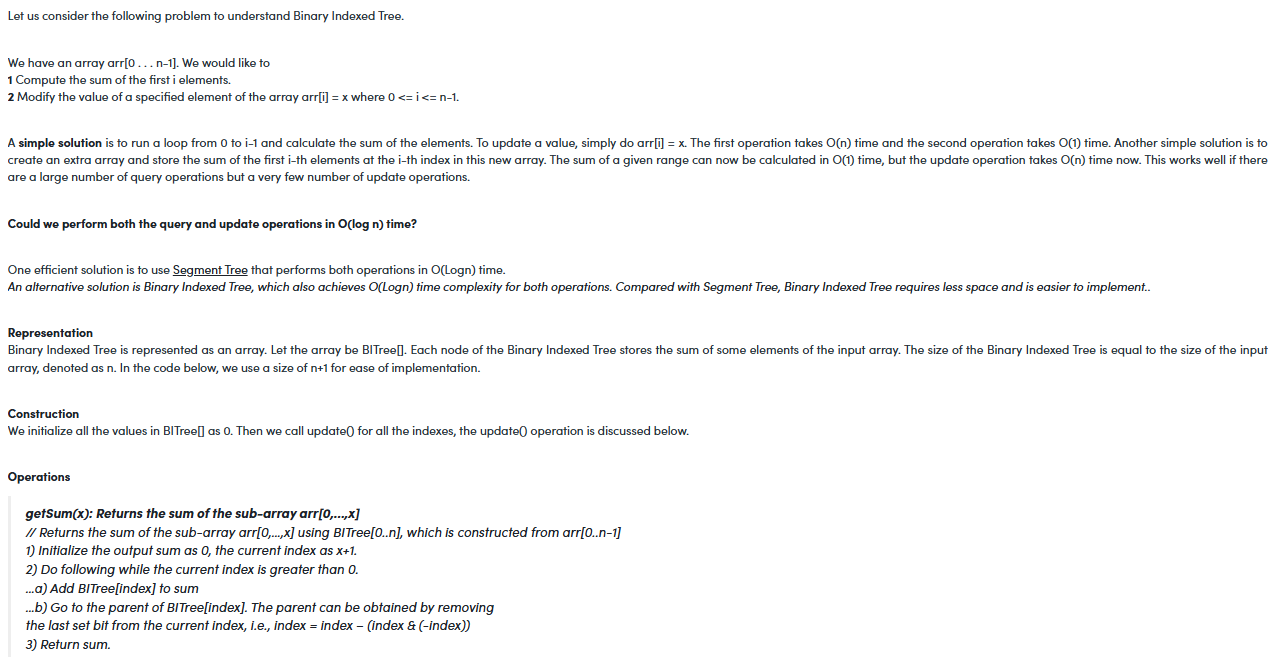

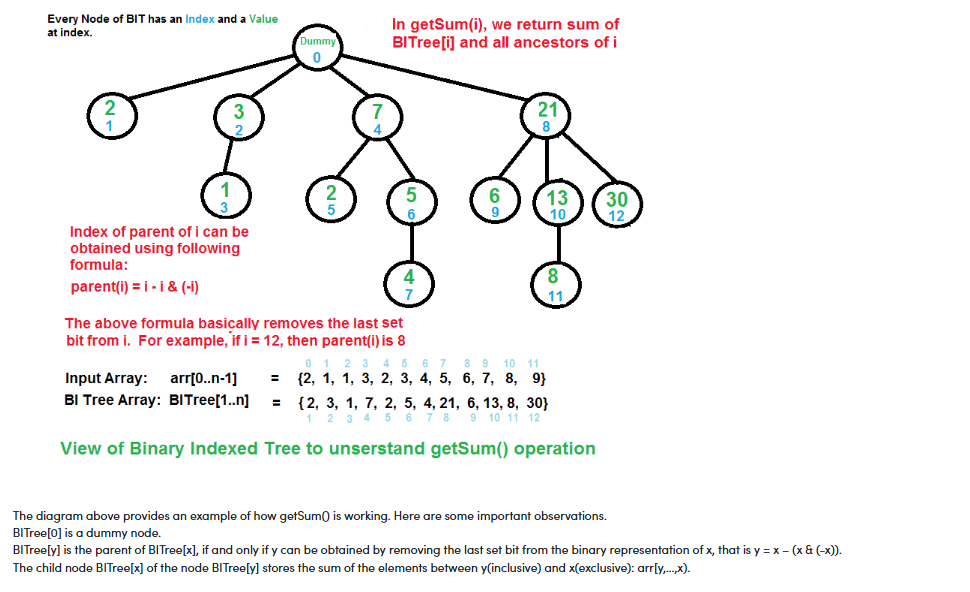

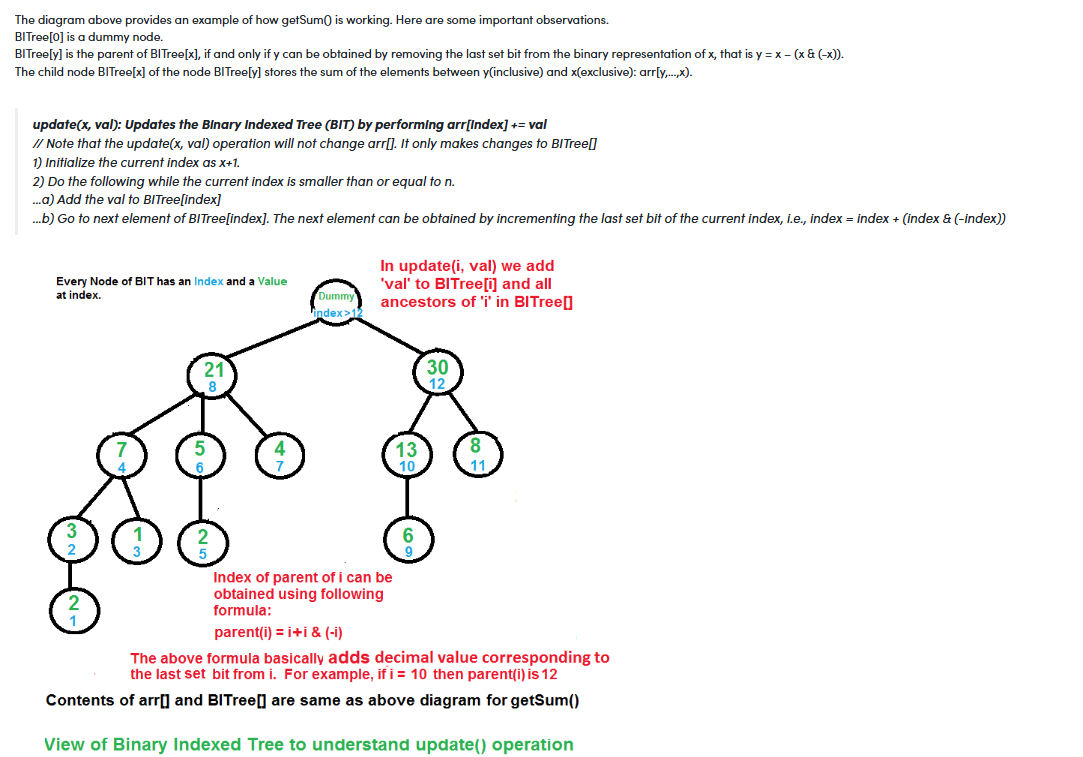

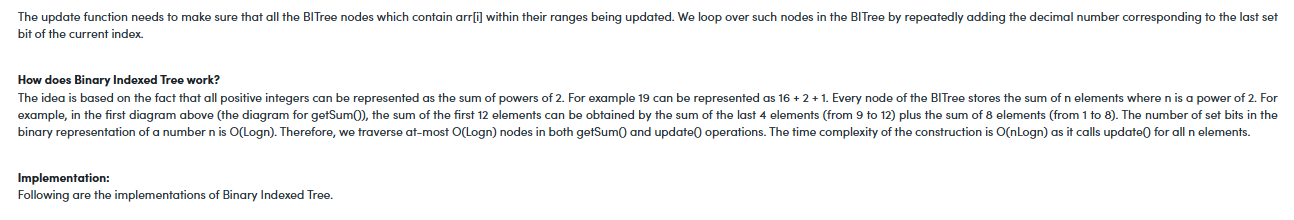

In [55]:
# Python implementation of Binary Indexed Tree

# Returns sum of arr[0..index]. This function assumes
# that the array is preprocessed and partial sums of
# array elements are stored in BITree[].
def getsum(BITTree,i):
	s = 0 #initialize result

	# index in BITree[] is 1 more than the index in arr[]
	i = i+1

	# Traverse ancestors of BITree[index]
	while i > 0:

		# Add current element of BITree to sum
		s += BITTree[i]

		# Move index to parent node in getSum View
		i -= i & (-i)
	return s

# Updates a node in Binary Index Tree (BITree) at given index
# in BITree. The given value 'val' is added to BITree[i] and
# all of its ancestors in tree.
def updatebit(BITTree , n , i ,v):

	# index in BITree[] is 1 more than the index in arr[]
	i += 1

	# Traverse all ancestors and add 'val'
	while i <= n:

		# Add 'val' to current node of BI Tree
		BITTree[i] += v

		# Update index to that of parent in update View
		i += i & (-i)


# Constructs and returns a Binary Indexed Tree for given
# array of size n.
def construct(arr, n):

	# Create and initialize BITree[] as 0
	BITTree = [0]*(n+1)

	# Store the actual values in BITree[] using update()
	for i in range(n):
		updatebit(BITTree, n, i, arr[i])

	# Uncomment below lines to see contents of BITree[]
	#for i in range(1,n+1):
	#	 print BITTree[i],
	return BITTree


# Driver code to test above methods
freq = [2, 1, 1, 3, 2, 3, 4, 5, 6, 7, 8, 9]
BITTree = construct(freq,len(freq))
print("Sum of elements in arr[0..5] is " + str(getsum(BITTree,5)))
freq[3] += 6
updatebit(BITTree, len(freq), 3, 6)
print("Sum of elements in arr[0..5]"+
					" after update is " + str(getsum(BITTree,5)))

Sum of elements in arr[0..5] is 12
Sum of elements in arr[0..5] after update is 18
